In [1]:
#Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format ='{:,.0f}'.format

In [2]:
#Загрузка данных
df=pd.read_excel('/datasets/new_history_03102023.xlsx')

In [3]:
#Информация о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171487 entries, 0 to 171486
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID Корпуса                171487 non-null  int64  
 1   ID ЖК                     171487 non-null  int64  
 2   ЖК рус                    171487 non-null  object 
 3   ЖК англ                   56952 non-null   object 
 4   Корпус                    171487 non-null  object 
 5   кр Корпус                 171487 non-null  object 
 6   Регион                    171487 non-null  object 
 7   ID кв                     171487 non-null  int64  
 8   Дата актуализации         171487 non-null  object 
 9   Комнат                    171487 non-null  int64  
 10  Площадь                   168124 non-null  float64
 11  Цена                      171169 non-null  float64
 12  Цена кв м                 167806 non-null  float64
 13  Этаж                      168961 non-null  f

In [4]:
#Удаление строк с пропусками по столбцам 'Цена' и 'Площадь'
df=df.dropna(subset=['Цена','Площадь'])

In [5]:
#Проверка пропусков после удаления
print('Пропусков в столбце "Площадь":',df['Площадь'].isna().sum())
print('Пропусков в столбце "Цена":',df['Цена'].isna().sum())

Пропусков в столбце "Площадь": 0
Пропусков в столбце "Цена": 0


In [6]:
#Создание итоговой таблицы
df_final=df.groupby(['Класс К','Комнат']).agg({'Площадь':'sum','Цена':'sum'})
df_final['Cредневзвешенная цена кв м в руб']=df_final['Цена']/df_final['Площадь']

df_final=df_final[['Cредневзвешенная цена кв м в руб']]
df_final

Cредневзвешенная цена кв м в руб
Класс К         Комнат                                  
бизнес          0                                234,170
                1                                460,655
                2                                422,617
                3                                432,035
                4                                454,190
де-люкс         0                              2,231,445
                1                              2,096,299
                2                              2,216,850
                3                              2,045,045
                4                              2,591,333
комфорт         0                                138,586
                1                                304,145
                2                                264,522
                3                                243,867
                4                                215,939
премиум         0                                381,525
                1                                853,852
                2                                744,513
                3                                785,822
                4                              1,039,899
эконом          0                                 90,392
                1                                203,654
                2                                182,502
                3                                173,142
                4                                172,921
эконом (панель) 0                                 86,580
                1                                226,523
                2                                212,490
                3                                201,696
                4                                192,973

In [7]:
df_final=df_final.reset_index()

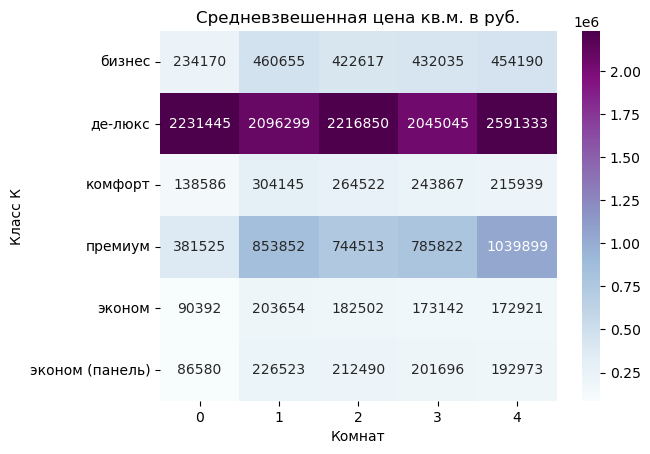

In [8]:
#Тепловая карта
df_for_heatmap = df_final.pivot(index="Класс К", columns="Комнат", values="Cредневзвешенная цена кв м в руб")
sns.heatmap(df_for_heatmap,annot=True,fmt=".0f",vmin=86580, vmax=2231445,cmap= 'BuPu')
plt.title('Cредневзвешенная цена кв.м. в руб.')
plt.show()

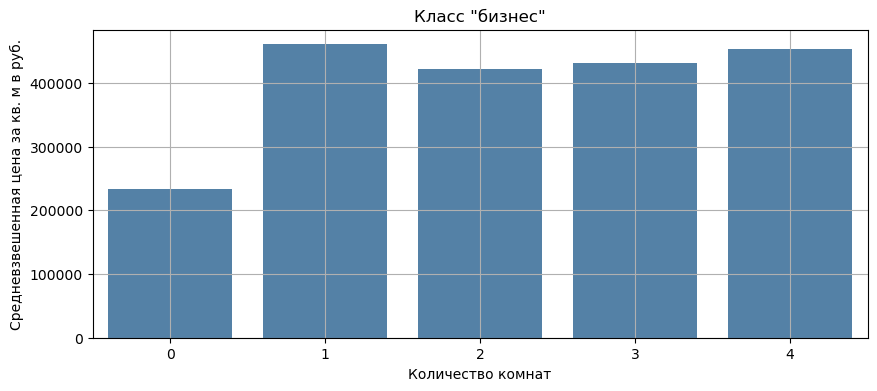

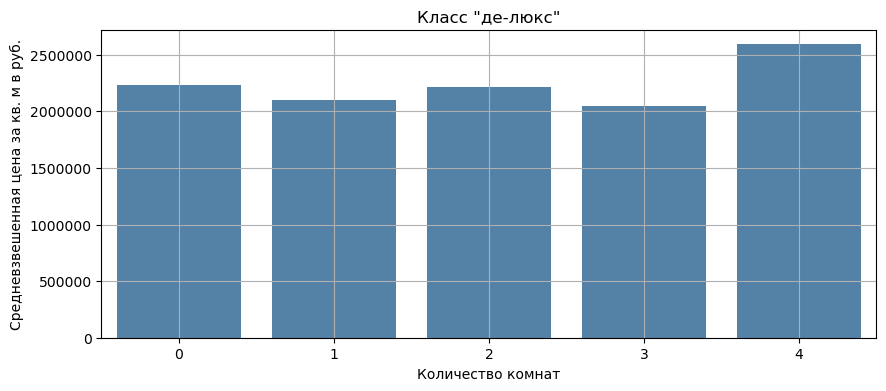

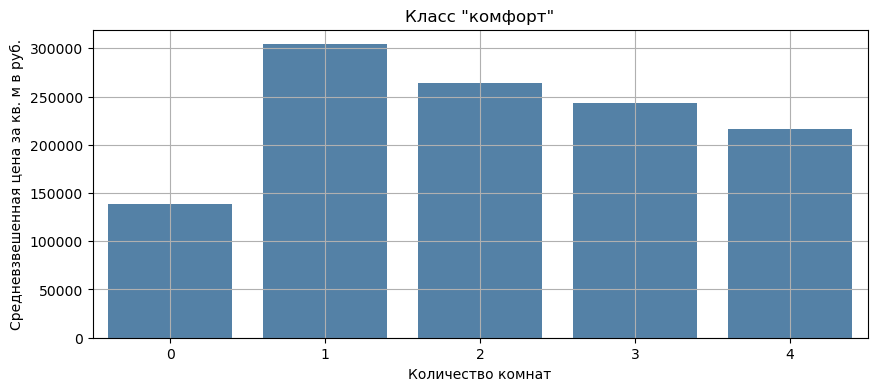

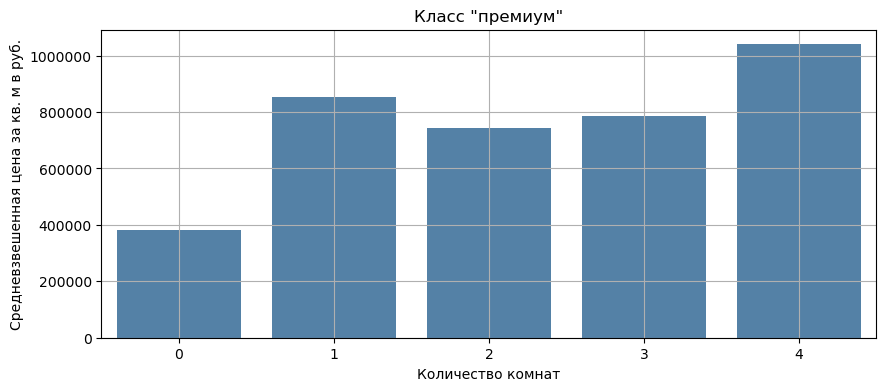

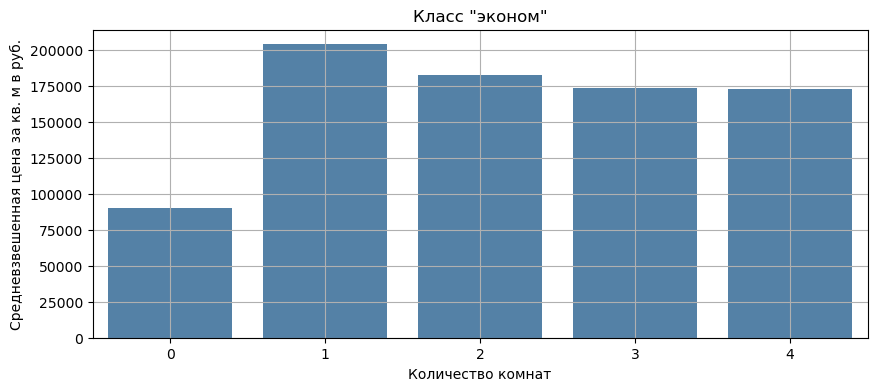

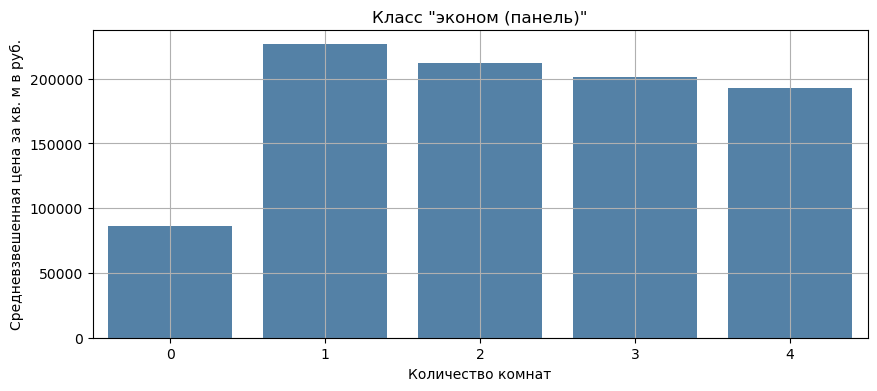

In [9]:
#Графики
for name in df_final['Класс К'].unique():
   fig, ax = plt.subplots(figsize=(10,4))
   ax.yaxis.get_major_formatter().set_scientific(False)
   ax.yaxis.get_major_formatter().set_useOffset(False)
   ax = sns.barplot(x = 'Комнат', y = 'Cредневзвешенная цена кв м в руб', data = df_final[df_final['Класс К']==name], color='steelblue')
   ax.set_title(f'Класс "{name}"')
   ax.set_ylabel('Средневзвешенная цена за кв. м в руб.')
   ax.set_xlabel('Количество комнат')
   plt.grid()
   plt.show()